<a href="https://colab.research.google.com/github/Ulfheonar5/Medical-Cost-Analysis/blob/main/Medical_Cost_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Required Libraries

In [226]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder ,MinMaxScaler
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics

#Perform An Exploratory Data Analysis

In [227]:
insurance =pd.read_csv("insurance.csv")
df = insurance.copy() # Asıl veriyi kaybetmemek için yedekliyoruz
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [228]:
# Verilerimizin özelliklerini inceliyoruz ve boş değer olup olmadığını kontrol ediyoruz.
df.info()
print("\n################################################\n " )
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

################################################
 


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [229]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Verilerimiz arasındaki ilişkinin genel görünümünü inceliyoruz.

Değişkenler pairplot:


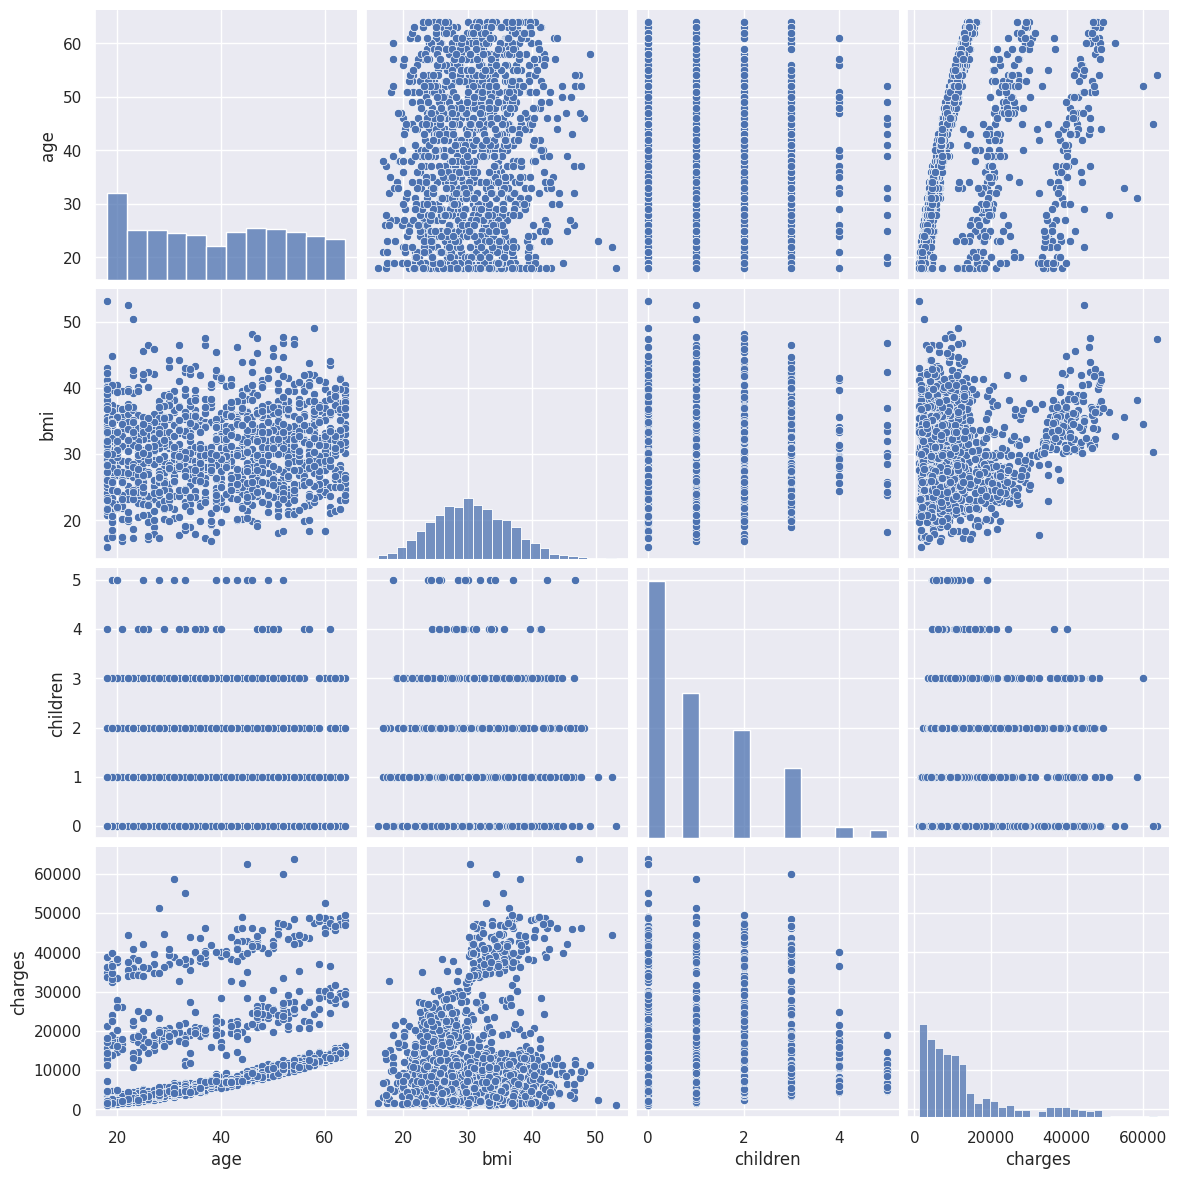

In [230]:
print('Değişkenler pairplot:')
sns_plot = sns.pairplot(insurance,height=3)
plt.show()

Vücut Kitle İndeks dağılımını inceleyelim.

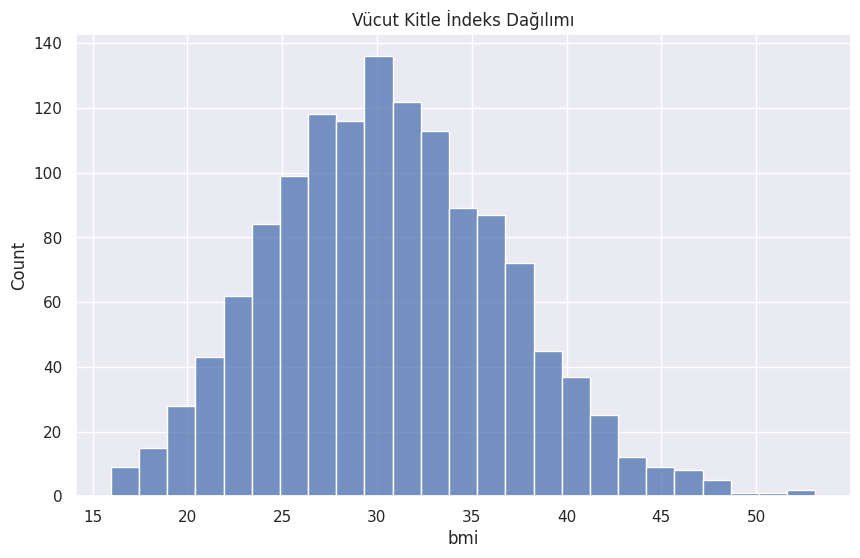

In [231]:
sns.set()
plt.figure(figsize=(10,6))
sns.histplot(df['bmi'])
plt.title('Vücut Kitle İndeks Dağılımı')
plt.show()


<ipython-input-232-3b0847ea0eb9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df = df.groupby(pd.Grouper(key='smoker')).mean()


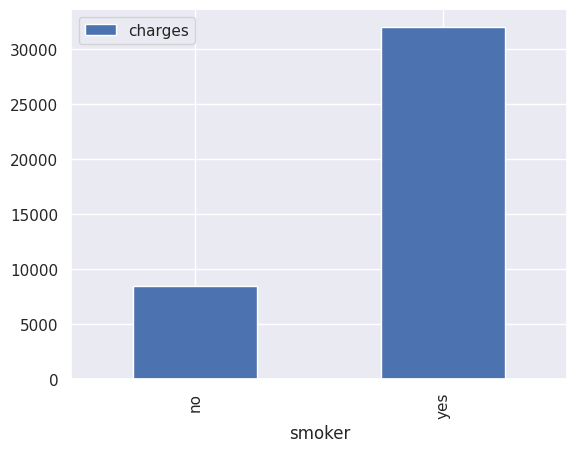

In [232]:
#Sigara içenler ve masraflar arasındaki ilişki
group_df = df.groupby(pd.Grouper(key='smoker')).mean()
group_df = group_df.sort_index()
group_df.plot(y = ['charges'],kind = 'bar')
plt.show()

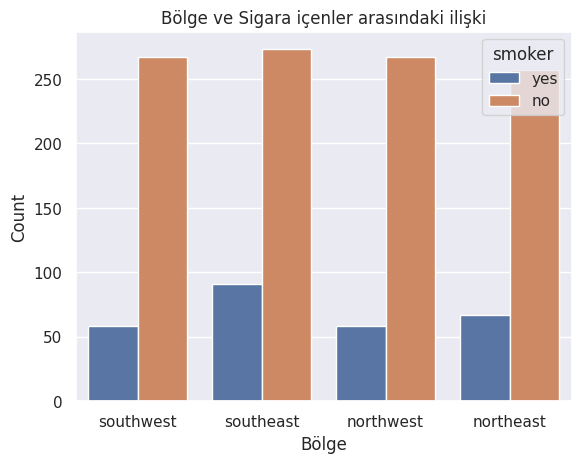

In [233]:
#Bölge ve sigara içenler arasındaki ilişki
sns.countplot(data=df, x='region', hue='smoker')
plt.xlabel("Bölge")
plt.ylabel("Count")
plt.title("Bölge ve Sigara içenler arasındaki ilişki")
plt.show()

<ipython-input-234-2bcf292afb95>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df = df.groupby(pd.Grouper(key='sex')).mean()


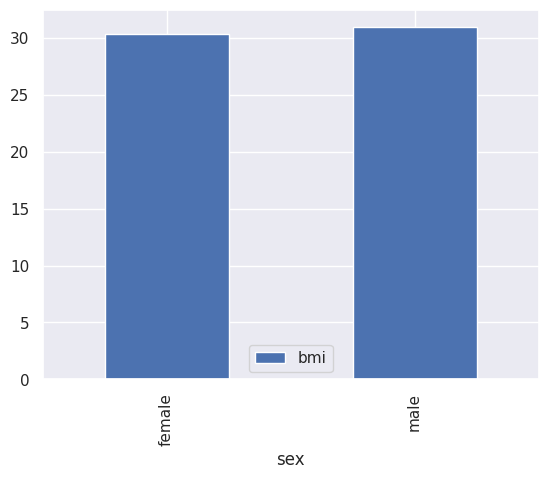

In [234]:
#Cinsiyet ve Vücut kitle indeksi arasındaki ilişki
group_df = df.groupby(pd.Grouper(key='sex')).mean()
group_df = group_df.sort_index()
group_df.plot(y = ['bmi'],kind = 'bar')
plt.show()

<ipython-input-235-aadcca70ba21>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df = df.groupby(pd.Grouper(key='region')).sum()




En fazla çocuğun olduğu bölge  382  çocuk ile Southeast bölgesidir



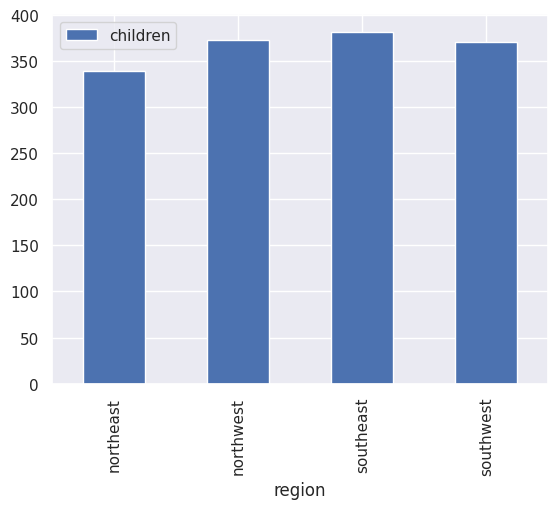

In [235]:
#Bölgelere göre çocuk sayısına bakarak en fazla çocuk sayısı olan bölgeyi buluyoruz.
group_df = df.groupby(pd.Grouper(key='region')).sum()
group_df = group_df.sort_index()
group_df.plot(y = ['children'],kind = 'bar')
print("\n\nEn fazla çocuğun olduğu bölge ",df.groupby("region")["children"].sum()['southeast']," çocuk ile Southeast bölgesidir\n"  )

plt.show()



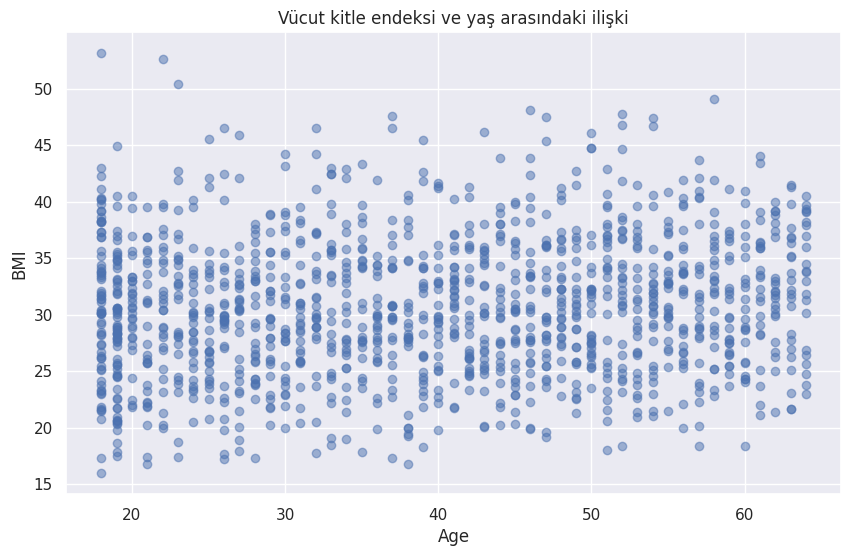

In [236]:
#Vücut kitle endeksi ve yaş arasındaki ilişkiyi inceliyoruz
plt.figure(figsize=(10, 6))
plt.scatter(df["age"], df["bmi"], alpha=0.5)
plt.title("Vücut kitle endeksi ve yaş arasındaki ilişki")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.grid(True)
plt.show()

<ipython-input-237-485e1f6003f6>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df = df.groupby(pd.Grouper(key='children')).mean()


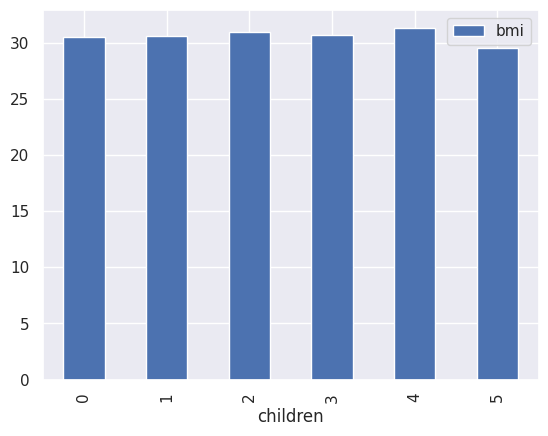

In [237]:
#Çocuk sayısı ve vücut kitle endeksi arasındaki ilişki
group_df = df.groupby(pd.Grouper(key='children')).mean()
group_df = group_df.sort_index()
group_df.plot(y = ['bmi'],kind = 'bar')
plt.show()

<Axes: xlabel='bmi'>

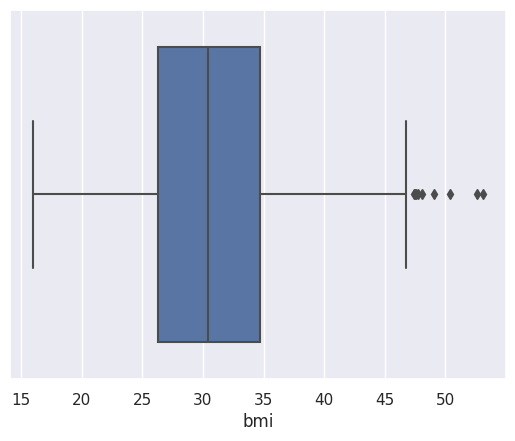

In [238]:
#Vücut kitle endeksinde aykırı değerler var mı diye kontrol ediyoruz.
#Birkaç aykırı değer olduğunu görebiliriz.
sns.boxplot(x="bmi",data=df)

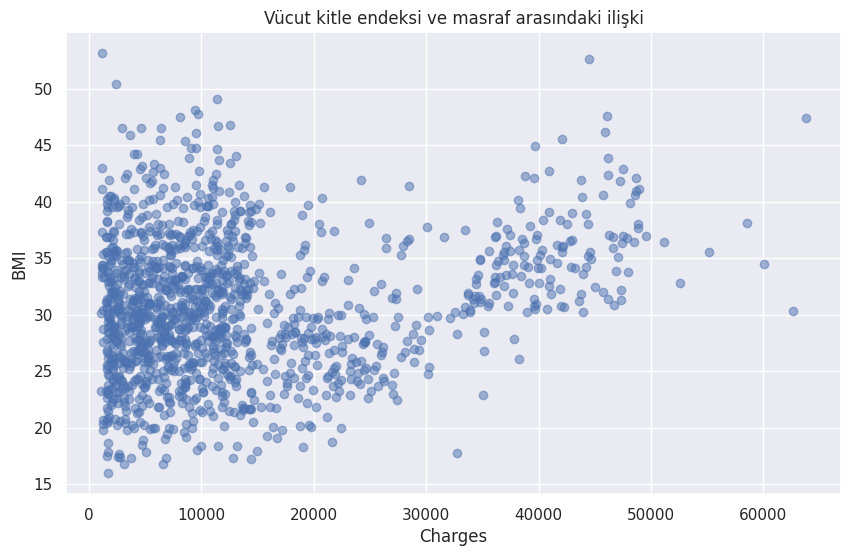

In [239]:
#Vücut kitle endeksi ve masraf arasındaki ilişkiyi inceliyoruz
plt.figure(figsize=(10, 6))
plt.scatter(df["charges"], df["bmi"], alpha=0.5)
plt.title("Vücut kitle endeksi ve masraf arasındaki ilişki")
plt.xlabel("Charges")
plt.ylabel("BMI")
plt.grid(True)
plt.show()

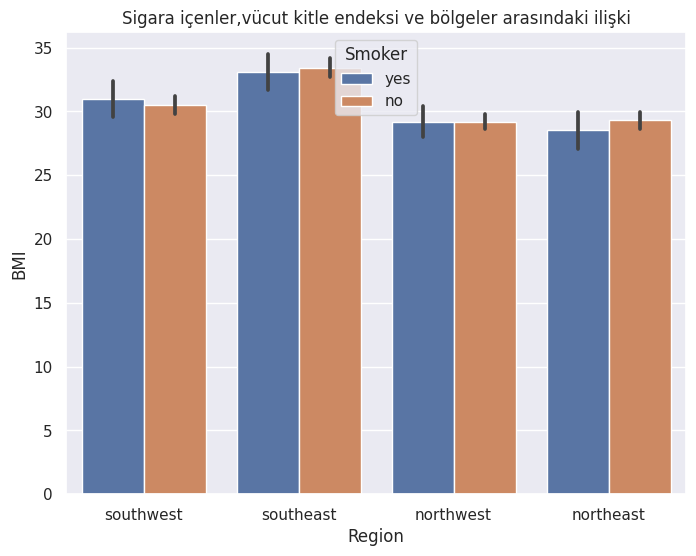

In [240]:
#Sigara içenler,vücut kitle endeksi ve bölgeler arasındaki ilişkiyi inceliyoruz
plt.figure(figsize=(8,6))
sns.barplot(x="region", y="bmi", hue="smoker", data=df)
plt.title("Sigara içenler,vücut kitle endeksi ve bölgeler arasındaki ilişki")
plt.xlabel("Region")
plt.ylabel("BMI")
plt.legend(title="Smoker")
plt.show()

#Data Preprocessing


In [241]:
#Kategorik verilerimizi sayısal verilere dönüştürüyoruz.
encode_sex = LabelEncoder()
encode_smoker = LabelEncoder()
encode_region = LabelEncoder()

df['sex'] = encode_sex.fit_transform(df['sex'])
df['smoker'] = encode_smoker.fit_transform(df['smoker'])
df['region'] = encode_region.fit_transform(df['region'])


df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [242]:
#Eğitim ve test veri setlerimizi ayırıyoruz.
y = df['charges']
X=df.drop(['charges'],axis=1)

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [243]:
#Veileri 0 ile 1 arasındaki değerlere dönüştürüyoruz.
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df.drop("charges", axis=1))
df = pd.DataFrame(X_scaled, columns=df.drop("charges", axis=1).columns)
df

,age,sex,bmi,children,smoker,region
0,0.021739,0.0,0.321227,0.0,1.0,1.000000
1,0.000000,1.0,0.479150,0.2,0.0,0.666667
2,0.217391,1.0,0.458434,0.6,0.0,0.666667
3,0.326087,1.0,0.181464,0.0,0.0,0.333333
4,0.304348,1.0,0.347592,0.0,0.0,0.333333
...,...,...,...,...,...,...
1333,0.695652,1.0,0.403820,0.6,0.0,0.333333
1334,0.000000,0.0,0.429379,0.0,0.0,0.000000
1335,0.000000,0.0,0.562012,0.0,0.0,0.666667
1336,0.065217,0.0,0.264730,0.0,0.0,1.000000


#Model Selection

Kategorik Verileri Sayısal Değerlere Dönüştürüyoruz.

Modellerin Performansına Göre Hangi Modeli Seçeceğimize karar veriyoruz.

In [244]:
#Modelleri oluşturuyoruz.
linear=LinearRegression()
linear.fit(X_train,y_train)
r_forest = RandomForestRegressor()
r_forest.fit(X_train,y_train)
s_vector=SVR()
s_vector.fit(X_train,y_train)

SVR()

In [245]:
#Oluşturduğumuz modelleri kullanarak tahminleri gerçek değerler ile karşılatırıyoruz.
linear_predict=linear.predict(X_test)
r_forest_predict=r_forest.predict(X_test)
s_vector_predict=s_vector.predict(X_test)

predict_df=pd.DataFrame({'Gerçek Değerler':y_test,'Linear':linear_predict,'r_forest':r_forest_predict,'s_vector':s_vector_predict})

predict_df

,Gerçek Değerler,Linear,r_forest,s_vector
764,9095.06825,8924.407244,12585.675444,9548.497618
887,5272.17580,7116.295018,5640.057043,9493.240235
890,29330.98315,36909.013521,28246.663520,9648.305149
1293,9301.89355,9507.874691,10747.982967,9555.219911
259,33750.29180,27013.350008,34424.890455,9421.456253
...,...,...,...,...
109,47055.53210,39116.968669,47125.833647,9648.427941
575,12222.89830,11814.555568,12825.595374,9625.054566
535,6067.12675,7638.107736,6386.154120,9504.794628
543,63770.42801,40959.081722,46597.415961,9604.857687


In [246]:
#Modellerimizin skorlarını değerlendirerek kullanacağımız modeli seçiyoruz.
linear_score = metrics.r2_score(y_test,linear_predict)
r_forest_score = metrics.r2_score(y_test,r_forest_predict)
s_vector_score = metrics.r2_score(y_test,s_vector_predict)

print(f"Linear Skoru:{linear_score} \nRandom Forest Skoru:{r_forest_score} \nSupport Vector Regression Skoru:{s_vector_score} ")



Linear Skoru:0.7833463107364539 
Random Forest Skoru:0.8655659426162439 
Support Vector Regression Skoru:-0.07230823043884493 


#Hyper-parameter Optimization

In [247]:
selected_model=RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 400],
    "max_depth": [5, 10, 20],
    "min_samples_split": [5, 10, 20]
}


forest_GS = GridSearchCV(selected_model, param_grid, cv=3, scoring='neg_mean_squared_error')
forest_GS.fit(X_scaled, y)
forest_GS.best_params_

{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}

#Model Evaluation

In [248]:
#Modeli optimize ediyoruz
y_pred=forest_GS.best_estimator_.predict(X_scaled)

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Absolute Eror:{mae} \nMean Squared Eror:{mse} \nR2:{r2}")

Mean Absolute Eror:2246.596389744799 
Mean Squared Eror:16505632.294649316 
R2:0.8873664481052633
